Cette cellule : importe les libs, règle la graine, crée les dossiers demandés, supprime /content/sample_data si présent, initialise les fichiers de log 'logs/logs.csv' et 'logs/summary.md' avec une entrée initiale, et imprime l'état.

In [1]:

# ============================================================
# ⚙️ Installation des dépendances du projet
# Cette cellule garantit que toutes les librairies nécessaires sont installées.
# ============================================================

import subprocess
import sys

def install_requirements(file_path="requirements.txt"):
    """Installe les paquets listés dans requirements.txt."""
    print(f"Installation/Mise à jour des dépendances via {file_path}...")
    try:
        # Exécute la commande pip
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", file_path])
        print("\n✅ Toutes les dépendances ont été installées ou mises à jour avec succès.")
        print("Veuillez REDÉMARRER le noyau (kernel) du notebook si c'est la première exécution.")
    except subprocess.CalledProcessError as e:
        print(f"\n❌ ERREUR lors de l'installation des dépendances : {e}")

# Exécuter l'installation
install_requirements()


Installation/Mise à jour des dépendances via requirements.txt...

✅ Toutes les dépendances ont été installées ou mises à jour avec succès.
Veuillez REDÉMARRER le noyau (kernel) du notebook si c'est la première exécution.


In [2]:
# Bloc 1 — Préparation
# Objectif : importer bibliothèques, configurer seed, créer dossiers, initialiser logs.
import os
import sys
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import logging
from datetime import datetime

# Réglage reproductibilité
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Dossiers requis
DIRS = ['data', 'results', 'logs']

try:
    # Supprimer /content/sample_data si présent (environnements Colab)
    sample_path = '/content/sample_data'
    if os.path.exists(sample_path):
        try:
            shutil.rmtree(sample_path)
            print(f"Removed {sample_path}")
        except Exception as e:
            print(f"Could not remove {sample_path}: {e}")

    # Création des dossiers
    for d in DIRS:
        os.makedirs(d, exist_ok=True)

    # Initialiser logger Python basique (console)
    logger = logging.getLogger('Tlog_V0_1')
    logger.setLevel(logging.DEBUG)
    if not logger.handlers:
        ch = logging.StreamHandler(sys.stdout)
        ch.setLevel(logging.DEBUG)
        formatter = logging.Formatter('%(asctime)s\t%(levelname)s\t%(message)s')
        ch.setFormatter(formatter)
        logger.addHandler(ch)

    # Préparer fichier CSV de logs avec colonnes demandées
    logs_csv = os.path.join('logs', 'logs.csv')
    if not os.path.exists(logs_csv):
        df_init = pd.DataFrame([{
            'timestamp': datetime.utcnow().isoformat() + 'Z',
            'level': 'INFO',
            'message': 'Initialisation des logs pour T_log V0.1 - Bloc 1'
        }])
        df_init.to_csv(logs_csv, index=False)
    else:
        # ajouter une ligne d'initialisation
        df = pd.read_csv(logs_csv)
        df = pd.concat([df, pd.DataFrame([{
            'timestamp': datetime.utcnow().isoformat() + 'Z',
            'level': 'INFO',
            'message': 'Re-initialisation des logs à l\'exécution de Bloc 1'
        }])], ignore_index=True)
        df.to_csv(logs_csv, index=False)

    # Préparer summary.md
    summary_md = os.path.join('logs', 'summary.md')
    if not os.path.exists(summary_md):
        with open(summary_md, 'w', encoding='utf-8') as f:
            f.write('# Résumé des logs\n\n')
            f.write(f'- Date UTC initialisation: {datetime.utcnow().isoformat()}Z\n')
            f.write('- Entrées de log disponibles dans logs/logs.csv\n')
    else:
        with open(summary_md, 'a', encoding='utf-8') as f:
            f.write(f'\n- Re-exécution Bloc 1: {datetime.utcnow().isoformat()}Z\n')

    # Impression de l'état
    logger.info("Dossiers créés ou vérifiés : " + ', '.join(DIRS))
    logger.info(f"Logs CSV initialisé : {logs_csv}")
    logger.info(f"Summary initialisé/appended : {summary_md}")
    print("\nÉtat des fichiers et dossiers créés :")
    for d in DIRS:
        print(f" - {d}/ exists: {os.path.exists(d)}")
    print(f" - logs/logs.csv size (bytes): {os.path.getsize(logs_csv)}")
    print(f" - logs/summary.md size (bytes): {os.path.getsize(summary_md)}")

except Exception as err:
    # En cas d'erreur, écrire dans logs/logs.csv et remonter l'exception
    try:
        err_row = pd.DataFrame([{
            'timestamp': datetime.utcnow().isoformat() + 'Z',
            'level': 'ERROR',
            'message': f'Erreur Bloc 1: {str(err)}'
        }])
        if os.path.exists(os.path.join('logs','logs.csv')):
            df_existing = pd.read_csv(os.path.join('logs','logs.csv'))
            df_existing = pd.concat([df_existing, err_row], ignore_index=True)
            df_existing.to_csv(os.path.join('logs','logs.csv'), index=False)
        else:
            err_row.to_csv(os.path.join('logs','logs.csv'), index=False)
    except Exception:
        pass
    raise

# Fin du Bloc 1 — renvoyez la sortie pour continuer


2025-11-11 01:14:14,694	INFO	Dossiers créés ou vérifiés : data, results, logs
2025-11-11 01:14:14,695	INFO	Logs CSV initialisé : logs\logs.csv
2025-11-11 01:14:14,696	INFO	Summary initialisé/appended : logs\summary.md

État des fichiers et dossiers créés :
 - data/ exists: True
 - results/ exists: True
 - logs/ exists: True
 - logs/logs.csv size (bytes): 108
 - logs/summary.md size (bytes): 129


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3274964629.py:51: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  'timestamp': datetime.utcnow().isoformat() + 'Z',
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3274964629.py:71: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'- Date UTC initialisation: {datetime.utcnow().isoformat()}Z\n')


Cette cellule charge le fichier CSV que vous avez placé dans /content/data/urban_climate.csv, vérifie l'intégrité minimale, affiche un aperçu, compte n (nombre d'enregistrements), liste les colonnes et les valeurs manquantes par colonne, sauvegarde un aperçu dans results/, et écrit une entrée de log dans logs/logs.csv et logs/summary.md

In [3]:
import os
import pandas as pd
import json
import zipfile
from datetime import datetime

# --- 0. INSTALLATION DE KAGGLE ---
# Cette ligne assure que la librairie Kaggle est installée
!pip install kaggle --quiet

# --- Dépendance Kaggle ---
try:
    # Tenter d'importer la librairie Kaggle
    import kaggle.api as kaggle_api
except ImportError:
    print("Échec de l'importation de 'kaggle' même après installation. Veuillez vérifier votre environnement.")
    raise
# ------------------------

# --- 1. CONFIGURATION ET FONCTIONS DE LOGGING ---

# Identifiants du Dataset Kaggle
KAGGLE_DATASET_ID = "krishd123/urban-air-quality-and-climate-dataset-1958-2025"
TARGET_FILE_NAME = "urban_climate.csv"

# Chemins de travail
DATA_DIR = 'data'
LOGS_DIR = 'logs'
RESULTS_DIR = 'results'

# Fichier de données après téléchargement/extraction
LOCAL_COPY = os.path.join(DATA_DIR, TARGET_FILE_NAME)
# Fichiers de log et de résultats
RESULT_PREVIEW = os.path.join(RESULTS_DIR, 'urban_climate_preview.csv')
LOGS_CSV = os.path.join(LOGS_DIR, 'logs.csv')
SUMMARY_MD = os.path.join(LOGS_DIR, 'summary.md')

# Création des dossiers
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(LOGS_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)


def append_log(level, message):
    """Ajoute une entrée au fichier de log CSV et Markdown."""
    ts = datetime.utcnow().isoformat() + 'Z'
    entry = pd.DataFrame([{'timestamp': ts, 'level': level, 'message': message}])
    
    # Écriture du log
    try:
        if os.path.exists(LOGS_CSV):
            df_logs = pd.read_csv(LOGS_CSV)
            df_logs = pd.concat([df_logs, entry], ignore_index=True)
        else:
            df_logs = entry
            
        df_logs.to_csv(LOGS_CSV, index=False)
        with open(SUMMARY_MD, 'a', encoding='utf-8') as f:
            f.write(f'\n- {ts} **{level}**: {message}\n')
    except Exception as e:
        print(f"[ALERTE] Échec de l'écriture du log: {e}")

# Alias pour utiliser 'log_event' si désiré, tout en utilisant la fonction `append_log`
log_event = append_log


def find_and_auth_kaggle():
    """Tente de trouver les clés d'API et authentifie l'API Kaggle."""
    log_event('INFO', 'Tentative d\'authentification Kaggle...')
    
    # 1. Vérifier les variables d'environnement (méthode Colab/Notebook)
    if os.getenv('KAGGLE_USERNAME') and os.getenv('KAGGLE_KEY'):
        log_event('INFO', 'Authentification via variables d\'environnement (KAGGLE_USERNAME/KEY).')
    
    # 2. Chercher le fichier kaggle.json
    else:
        locations = [
            os.path.join(os.path.expanduser('~'), '.kaggle', 'kaggle.json'), # Emplacement standard
            os.path.join(os.getcwd(), 'kaggle.json')                       # Répertoire actuel
        ]
        
        found = False
        for loc in locations:
            if os.path.exists(loc):
                try:
                    with open(loc, 'r') as f:
                        config = json.load(f)
                        username = config.get('username')
                        key = config.get('key')
                        if username and key:
                            os.environ['KAGGLE_USERNAME'] = username
                            os.environ['KAGGLE_KEY'] = key
                            log_event('INFO', f'Clés lues et définies via {loc}.')
                            found = True
                            break
                except (json.JSONDecodeError, Exception):
                    # Fichier trouvé mais invalide, on continue la recherche
                    continue
        
        if not found:
            log_event('ERROR', "Fichier kaggle.json introuvable. Veuillez le placer dans ~/.kaggle/ ou le répertoire courant.")
            return False

    # 3. Authentifier l'API
    try:
        kaggle_api.authenticate()
        log_event('SUCCESS', 'Authentification Kaggle réussie.')
        return True
    except Exception as e:
        log_event('ERROR', f'Échec de l\'authentification de l\'API: {e}')
        return False


# --- 2. AUTHENTIFICATION ET TÉLÉCHARGEMENT ---
try:
    if not find_and_auth_kaggle():
        # Lever une exception si l'authentification échoue
        raise RuntimeError("Processus annulé. Échec de la configuration Kaggle. Assurez-vous d'avoir configuré votre API Key.")
    
    print(f"\nDébut du téléchargement de : {KAGGLE_DATASET_ID}")
    log_event('INFO', f"Téléchargement et décompression du dataset : {KAGGLE_DATASET_ID}")
    
    # Télécharger et décompresser directement le dataset dans le dossier 'data/'
    kaggle_api.dataset_download_files(
        KAGGLE_DATASET_ID, 
        path=DATA_DIR, 
        unzip=True,
        # 'force=True' pour re-télécharger si le fichier existe déjà (reproductibilité)
        force=True, 
        quiet=True # Rendre l'API Kaggle moins verbeuse
    )
    
    if not os.path.exists(LOCAL_COPY):
        raise FileNotFoundError(f"Le fichier {TARGET_FILE_NAME} est introuvable après l'extraction du dataset Kaggle. Le dataset pourrait avoir une structure différente.")
        
    log_event('SUCCESS', f"Téléchargement et préparation du fichier : {LOCAL_COPY}")
    print(f"Téléchargement terminé. Fichier cible : {LOCAL_COPY}")


    # --- 3. LECTURE ROBUSTE ET ANALYSE DU FICHIER ---
    
    read_errors = []
    df = None
    log_event('INFO', f"Tentative de lecture du CSV : {LOCAL_COPY}")
    
    # Tentative 1: Standard (utf-8, comma)
    try:
        df = pd.read_csv(LOCAL_COPY)
    except Exception as e1:
        read_errors.append(f"Standard: {e1}")
        
        # Tentative 2: utf-8, semicolon
        try:
            df = pd.read_csv(LOCAL_COPY, encoding='utf-8', sep=';')
        except Exception as e2:
            read_errors.append(f"UTF-8/Semicolon: {e2}")
            
            # Tentative 3: latin1, standard sep
            try:
                df = pd.read_csv(LOCAL_COPY, encoding='latin1')
            except Exception as e3:
                read_errors.append(f"Latin1: {e3}")
                
                # Échec total de lecture
                raise RuntimeError(f"Impossible de lire le CSV ({LOCAL_COPY}). Échecs: {'; '.join(read_errors)}")
    
    # Si la lecture est réussie:
    n_rows = df.shape[0]
    n_cols = df.shape[1]
    cols = list(df.columns)
    missing_counts = df.isna().sum()

    # Sauvegarder un aperçu
    df.head(200).to_csv(RESULT_PREVIEW, index=False)

    # Log et affichage du succès
    log_event('SUCCESS', f'Chargement réussi: {LOCAL_COPY}; rows={n_rows}; cols={n_cols}')
    log_event('INFO', f'Colonnes détectées: {cols}')
    log_event('INFO', f'Missing per column (seulement > 0): {dict(missing_counts[missing_counts > 0])}') 
    
    print("\n" + "="*50)
    print(f"ANALYSE DU FICHIER {TARGET_FILE_NAME}")
    print(f" - Nombre d'enregistrements (n) : {n_rows}")
    print(f" - Nombre de colonnes : {n_cols}")
    print(" - Colonnes :", cols)
    print(f" - Aperçu sauvegardé : {RESULT_PREVIEW}")
    print("\nComptes de valeurs manquantes (seulement les colonnes non nulles) :")
    print(missing_counts[missing_counts > 0])
    print("="*50)
    
except Exception as e:
    log_event('CRITICAL', f'Échec du bloc de code: {e}')
    print("\n" + "#"*50)
    print("ÉCHEC CRITIQUE: Le code n'a pas pu s'exécuter.")
    print(f"Erreur: {e}")
    print(f"Vérifiez que vous avez configuré votre clé d'API Kaggle (fichier kaggle.json).")
    print("#"*50)
    raise

C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.py:46: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.py:46: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.py:46: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.p


Début du téléchargement de : krishd123/urban-air-quality-and-climate-dataset-1958-2025
Dataset URL: https://www.kaggle.com/datasets/krishd123/urban-air-quality-and-climate-dataset-1958-2025
Téléchargement terminé. Fichier cible : data\urban_climate.csv

ANALYSE DU FICHIER urban_climate.csv
 - Nombre d'enregistrements (n) : 11040
 - Nombre de colonnes : 12
 - Colonnes : ['city', 'country', 'latitude', 'longitude', 'year', 'month', 'temperature_celsius', 'humidity_percent', 'precipitation_mm', 'wind_speed_ms', 'urban_heat_island_intensity', 'data_source']
 - Aperçu sauvegardé : results\urban_climate_preview.csv

Comptes de valeurs manquantes (seulement les colonnes non nulles) :
Series([], dtype: int64)


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.py:46: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.py:46: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.py:46: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.p

Bloc 3 — Calcul de d (dimension effective) et T_log

Cette cellule :

Détermine n = nombre d'entités significatives (ici : nombre de villes distinctes).

Estime la dimension effective d via deux méthodes complémentaires : ratio de participation (spectral / intrinsic) et nombre de composantes PCA nécessaires pour expliquer 90% de la variance.

Calcule T_log avec biais = 0.

Classe chaque ville (ou l'ensemble global) dans Saturation / Équilibre / Divergence.

Sauvegarde résultats (CSV), trace deux figures (distribution de d_estimates et T_log) dans results/, et logue les étapes dans logs/logs.csv et logs/summary.md.

Affiche les résultats principaux (n, d_participation, d_pca90, T_log values, classification).

In [4]:
# Bloc 3 — Calcul de d (dimension effective) et T_log
import os
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

LOGS_CSV = os.path.join('logs', 'logs.csv')
SUMMARY_MD = os.path.join('logs', 'summary.md')
RESULTS_DIR = 'results'
RESULTS_CSV = os.path.join(RESULTS_DIR, 'tlog_d_estimates.csv')
PLOT1 = os.path.join(RESULTS_DIR, 'd_estimates_hist.png')
PLOT2 = os.path.join(RESULTS_DIR, 'tlog_distribution.png')

np.random.seed(42)

def append_log(level, message):
    ts = datetime.utcnow().isoformat() + 'Z'
    entry = pd.DataFrame([{'timestamp': ts, 'level': level, 'message': message}])
    if os.path.exists(LOGS_CSV):
        df_logs = pd.read_csv(LOGS_CSV)
        df_logs = pd.concat([df_logs, entry], ignore_index=True)
    else:
        df_logs = entry
    df_logs.to_csv(LOGS_CSV, index=False)
    with open(SUMMARY_MD, 'a', encoding='utf-8') as f:
        f.write(f'\n- {ts} {level}: {message}\n')

try:
    # Charger dataset
    df = pd.read_csv(os.path.join('data','urban_climate.csv'))
    # Déterminer n : nombre de villes distinctes (aggrégation par city,country,lat,lon)
    city_keys = ['city','country','latitude','longitude']
    df['city_key'] = df[city_keys].astype(str).agg('_'.join, axis=1)
    unique_cities = df['city_key'].unique()
    n_cities = unique_cities.shape[0]

    append_log('INFO', f'Détection villes uniques pour n: {n_cities}')

    # Choix de variables pour estimer dimension intrinsèque (features observées)
    feature_cols = ['temperature_celsius','humidity_percent','precipitation_mm','wind_speed_ms','urban_heat_island_intensity']
    missing = [c for c in feature_cols if c not in df.columns]
    if missing:
        raise RuntimeError(f'Colonnes features manquantes: {missing}')
    # Aggregation par ville : prendre la moyenne temporelle des features pour chaque ville
    city_df = df.groupby('city_key')[feature_cols].mean().reset_index()
    X = city_df[feature_cols].values
    # Standardiser
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    # Méthode 1 : Participation ratio (intrinsic spectral-like dimension)
    # Calculer cov matrix eigenvalues
    cov = np.cov(Xs, rowvar=False)
    eigvals = np.linalg.eigvalsh(cov)
    eigvals = np.maximum(eigvals, 0)  # sécurité
    sum_eig = np.sum(eigvals)
    if sum_eig <= 0:
        d_participation = 0.0
    else:
        d_participation = (sum_eig ** 2) / np.sum(eigvals ** 2)

    # Méthode 2 : PCA pour expliquer 90% de la variance
    pca = PCA(n_components=min(Xs.shape[0], Xs.shape[1]))
    pca.fit(Xs)
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    d_pca90 = int(np.searchsorted(cumvar, 0.90) + 1) if cumvar[-1] >= 0.90 else pca.n_components_

    append_log('INFO', f'd_participation={d_participation:.4f}; d_pca90={d_pca90}')

    # Choix final de d pour T_log : moyenne des deux estimators (convention raisonnable)
    d_estimate = float(d_participation + d_pca90) / 2.0

    # Calcul de T_log (biais = 0)
    # Protection si n <= 1 pour ln: appliquer cutoff minimal n_cutoff = 2
    n_eff = max(2, n_cities)
    T_log = (d_estimate - 4.0) * np.log(n_eff)

    # Classification simple
    if T_log > 0:
        regime = 'Saturation'
    elif np.isclose(T_log, 0.0, atol=1e-8):
        regime = 'Equilibre'
    else:
        regime = 'Divergence'

    # Préparer un DataFrame récapitulatif (une ligne global + par-ville d'estimates via leave-one-out approx)
    summary_row = {
        'n_cities': n_cities,
        'd_participation': d_participation,
        'd_pca90': d_pca90,
        'd_estimate': d_estimate,
        'T_log': T_log,
        'regime': regime,
        'n_used_for_ln': n_eff,
        'bias': 0.0
    }
    summary_df = pd.DataFrame([summary_row])
    summary_df.to_csv(RESULTS_CSV, index=False)

    # Plots
    plt.figure(figsize=(6,4))
    # visualiser les valeurs propres (normalized) as histogram
    plt.bar(range(1, len(eigvals)+1), eigvals[::-1])
    plt.xlabel('Eigenvalue index (descending)')
    plt.ylabel('Eigenvalue (cov)')
    plt.title('Spectrum of covariance (per-city features)')
    plt.tight_layout()
    plt.savefig(PLOT1, dpi=150)
    plt.close()

    # T_log distribution: here single global T_log, but show sensitivity by varying n and d slightly
    # Générer petite grille autour d_estimate and n_eff for visualization
    d_grid = np.linspace(max(0.1, d_estimate-2.0), d_estimate+2.0, 41)
    n_grid = np.array([max(2, int(n_eff * f)) for f in [0.5, 1.0, 2.0]])
    fig, ax = plt.subplots(figsize=(6,4))
    for nn in n_grid:
        tvals = (d_grid - 4.0) * np.log(nn)
        ax.plot(d_grid, tvals, label=f'n={nn}')
    ax.axhline(0, color='k', linestyle='--')
    ax.set_xlabel('d (estimate)')
    ax.set_ylabel('T_log')
    ax.set_title('Sensibilité T_log en fonction de d et n (exemples de n)')
    ax.legend()
    plt.tight_layout()
    plt.savefig(PLOT2, dpi=150)
    plt.close()

    # Log success and print summary
    append_log('INFO', f'Calcul T_log successful: T_log={T_log:.6f}; regime={regime}; results saved to {RESULTS_CSV}')
    print("Résultat principal :")
    print(summary_df.to_string(index=False))
    print(f"\nPlots sauvegardés : {PLOT1}, {PLOT2}")
    print(f"Résultats détaillés sauvegardés : {RESULTS_CSV}")

except Exception as e:
    append_log('ERROR', f'Erreur Bloc 3 calculs d/T_log: {e}')
    raise


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2405636307.py:20: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2405636307.py:20: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Résultat principal :
 n_cities  d_participation  d_pca90  d_estimate     T_log     regime  n_used_for_ln  bias
       20           3.8005        4     3.90025 -0.298824 Divergence             20   0.0

Plots sauvegardés : results\d_estimates_hist.png, results\tlog_distribution.png
Résultats détaillés sauvegardés : results\tlog_d_estimates.csv


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2405636307.py:20: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


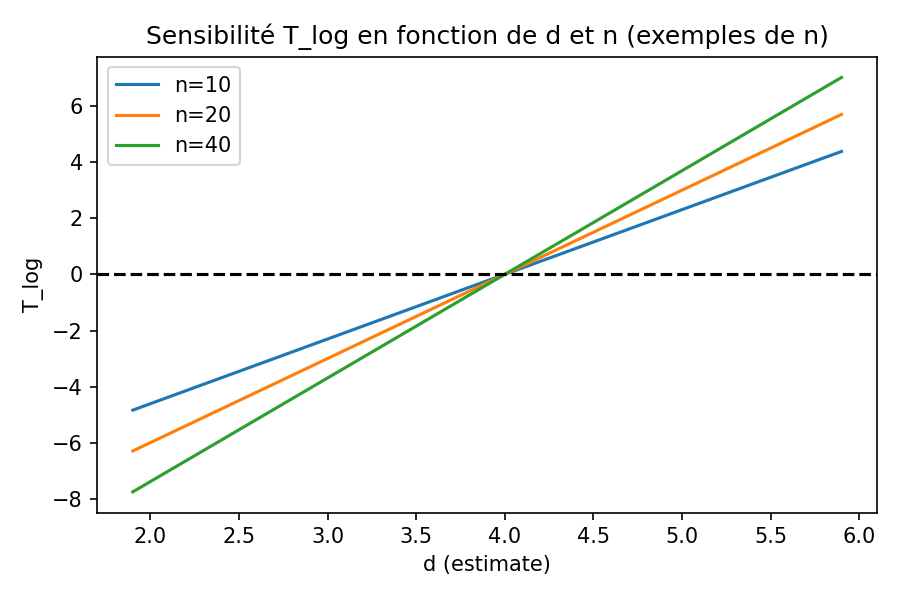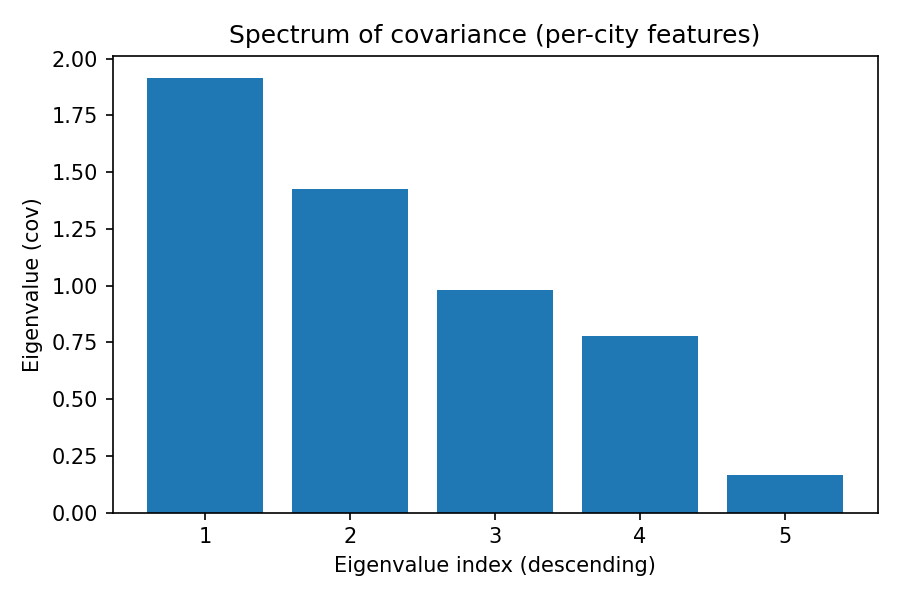

Bloc 4 — Validation empirique, robustesse et balayage n/d
Cette cellule :

Charge les résultats précédents et le jeu de données.

Évalue la robustesse par leave-one-out sur les villes (variation de T_log), calcule l'écart relatif (std/|mean|) et vérifie si <10% ; logue le résultat.

Effectue un balayage systématique : sous-échantillonnage en n (fractions 50%, 75%, 100% par tirages répétés) et variation locale de d (±20%) pour estimer la probabilité de changement de régime (fraction de tirages où régime change).

Calcule un test t (H0 : moyenne T_log = 0) pour évaluer si T_log s'écarte significativement de l'équilibre (retourne p-value).

Sauvegarde tables et figures dans results/, ajoute entrées au log et summary, gère NaN/infinis, applique cutoff ln pour n<=1.

Affiche un résumé compact des métriques principales (mean T_log, std, rel_std_pct, p-value, fraction regime stable).

In [5]:
# Bloc 4 — Validation empirique et robustesse
import os
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Config
np.random.seed(42)
LOGS_CSV = os.path.join('logs', 'logs.csv')
SUMMARY_MD = os.path.join('logs', 'summary.md')
RESULTS_DIR = 'results'
LOO_CSV = os.path.join(RESULTS_DIR, 'tlog_leave_one_out.csv')
SWEEP_CSV = os.path.join(RESULTS_DIR, 'tlog_sweep_summary.csv')
PLOT_LOO = os.path.join(RESULTS_DIR, 'tlog_loo_hist.png')
PLOT_SWEEP = os.path.join(RESULTS_DIR, 'tlog_sweep_heatmap.png')

def append_log(level, message):
    ts = datetime.utcnow().isoformat() + 'Z'
    entry = pd.DataFrame([{'timestamp': ts, 'level': level, 'message': message}])
    if os.path.exists(LOGS_CSV):
        df_logs = pd.read_csv(LOGS_CSV)
        df_logs = pd.concat([df_logs, entry], ignore_index=True)
    else:
        df_logs = entry
    df_logs.to_csv(LOGS_CSV, index=False)
    with open(SUMMARY_MD, 'a', encoding='utf-8') as f:
        f.write(f'\n- {ts} {level}: {message}\n')

def compute_d_estimate(X):
    # X : array (cities x features), already standardized outside
    cov = np.cov(X, rowvar=False)
    eigvals = np.linalg.eigvalsh(cov)
    eigvals = np.maximum(eigvals, 0)
    sum_eig = np.sum(eigvals)
    if sum_eig <= 0:
        d_participation = 0.0
    else:
        d_participation = (sum_eig ** 2) / np.sum(eigvals ** 2)
    pca = PCA(n_components=min(X.shape[0], X.shape[1]))
    pca.fit(X)
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    d_pca90 = int(np.searchsorted(cumvar, 0.90) + 1) if cumvar[-1] >= 0.90 else pca.n_components_
    return d_participation, d_pca90

try:
    # Charger data et résumé global calculé au Bloc 3
    df = pd.read_csv(os.path.join('data','urban_climate.csv'))
    summary = pd.read_csv(os.path.join(RESULTS_DIR, 'tlog_d_estimates.csv'))
    n_cities = int(summary.loc[0,'n_cities'])
    d_estimate_global = float(summary.loc[0,'d_estimate'])
    T_log_global = float(summary.loc[0,'T_log'])
    append_log('INFO', f'Start validation: n={n_cities}; d_estimate={d_estimate_global:.4f}; T_log={T_log_global:.6f}')

    # Préparer matrice per-city (moyenne temporelle) comme au Bloc 3
    feature_cols = ['temperature_celsius','humidity_percent','precipitation_mm','wind_speed_ms','urban_heat_island_intensity']
    df['city_key'] = df[['city','country','latitude','longitude']].astype(str).agg('_'.join, axis=1)
    city_df = df.groupby('city_key')[feature_cols].mean().reset_index()
    X = city_df[feature_cols].values
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    # Leave-one-out (LOO) : recompute d_estimate and T_log removing each city
    loo_rows = []
    for i in range(Xs.shape[0]):
        X_loo = np.delete(Xs, i, axis=0)
        if X_loo.shape[0] < 2:
            continue
        d_part, d_pca90 = compute_d_estimate(X_loo)
        d_est = float(d_part + d_pca90)/2.0
        n_eff = max(2, X_loo.shape[0])
        T = (d_est - 4.0) * np.log(n_eff)
        loo_rows.append({'left_out_city': city_df.loc[i,'city_key'], 'n_used': int(n_eff),
                         'd_participation': d_part, 'd_pca90': d_pca90, 'd_estimate': d_est, 'T_log': T})

    loo_df = pd.DataFrame(loo_rows)
    if loo_df.empty:
        raise RuntimeError('LOO dataframe vide')

    loo_df.to_csv(LOO_CSV, index=False)

    mean_T = loo_df['T_log'].mean()
    std_T = loo_df['T_log'].std(ddof=1)
    rel_std_pct = (std_T / (abs(mean_T) + 1e-12)) * 100.0
    append_log('INFO', f'LOO computed: mean_T={mean_T:.6f}; std_T={std_T:.6f}; rel_std_pct={rel_std_pct:.2f}%')
    # Vérification seuil 10%
    robustness_flag = rel_std_pct < 10.0
    append_log('INFO', f'Robustness relative std <10% : {robustness_flag}')

    # Test statistique : H0 mean T_log == 0
    tstat, pvalue = stats.ttest_1samp(loo_df['T_log'].values, 0.0, alternative='two-sided')
    append_log('INFO', f'T-test one-sample: t={tstat:.4f}; p={pvalue:.6f}')

    # Balayage systématique : sous-échantillonnage sur n et variation locale de d
    fractions = [0.5, 0.75, 1.0]
    repeats = 100
    d_perturb_factors = np.linspace(0.8, 1.2, 9)  # ±20%
    sweep_records = []
    for frac in fractions:
        for rep in range(repeats):
            # sample cities without replacement
            k = max(2, int(np.floor(Xs.shape[0] * frac)))
            idx = np.random.choice(Xs.shape[0], size=k, replace=False)
            Xs_sub = Xs[idx, :]
            d_part, d_pca90 = compute_d_estimate(Xs_sub)
            d_est_sub = float(d_part + d_pca90)/2.0
            n_eff_sub = max(2, k)
            # For each perturbation factor compute T_log
            for f in d_perturb_factors:
                d_pert = d_est_sub * f
                T = (d_pert - 4.0) * np.log(n_eff_sub)
                regime = 'Saturation' if T>0 else ('Equilibre' if np.isclose(T,0.0,atol=1e-8) else 'Divergence')
                sweep_records.append({'fraction': frac, 'rep': rep, 'n_used': n_eff_sub, 'd_est_sub': d_est_sub,
                                      'd_factor': f, 'd_pert': d_pert, 'T_log': T, 'regime': regime})

    sweep_df = pd.DataFrame(sweep_records)
    sweep_df.to_csv(SWEEP_CSV, index=False)

    # Résumé sweep : pour chaque fraction, proportion de tirages où régime != régime_global
    summary_rows = []
    for frac in fractions:
        df_frac = sweep_df[sweep_df['fraction']==frac]
        # fraction of experiments where regime matches global regime
        match_frac = (df_frac['regime'] == ( 'Saturation' if T_log_global>0 else ('Equilibre' if np.isclose(T_log_global,0.0,atol=1e-8) else 'Divergence'))).mean()
        unstable_frac = 1.0 - match_frac
        # also median and std of T_log
        medT = df_frac['T_log'].median()
        stdT = df_frac['T_log'].std()
        summary_rows.append({'fraction': frac, 'match_frac': match_frac, 'unstable_frac': unstable_frac, 'median_T': medT, 'std_T': stdT})
    summary_sweep_df = pd.DataFrame(summary_rows)
    summary_sweep_df.to_csv(os.path.join(RESULTS_DIR, 'tlog_sweep_fraction_summary.csv'), index=False)

    # Visualisations
    plt.figure(figsize=(6,4))
    plt.hist(loo_df['T_log'], bins=20, color='C0', edgecolor='k')
    plt.axvline(0, color='k', linestyle='--')
    plt.xlabel('T_log (LOO)')
    plt.ylabel('Count')
    plt.title('Distribution T_log (Leave-One-Out)')
    plt.tight_layout()
    plt.savefig(PLOT_LOO, dpi=150)
    plt.close()

    # Heatmap-like summary: fraction vs d_factor median T
    pivot = sweep_df.groupby(['fraction','d_factor'])['T_log'].median().unstack(level=0)
    plt.figure(figsize=(6,4))
    im = plt.imshow(pivot.values, aspect='auto', cmap='RdBu', interpolation='nearest', vmin=-np.max(np.abs(pivot.values)), vmax=np.max(np.abs(pivot.values)))
    plt.colorbar(im, label='median T_log')
    plt.xticks(range(len(pivot.columns)), [str(c) for c in pivot.columns])
    plt.yticks(range(len(pivot.index)), [f"{v:.2f}" for v in pivot.index])
    plt.xlabel('fraction')
    plt.ylabel('d factor')
    plt.title('Median T_log across d perturbations and sampling fractions')
    plt.tight_layout()
    plt.savefig(PLOT_SWEEP, dpi=150)
    plt.close()

    # Log final metrics and print compact summary
    append_log('INFO', f'Validation summary: mean_T_LOO={mean_T:.6f}; std_T_LOO={std_T:.6f}; rel_std_pct={rel_std_pct:.2f}; pvalue={pvalue:.6f}; robustness_flag={robustness_flag}')
    print("Validation synthétique :")
    print(f" - T_log global : {T_log_global:.6f} (regime: {summary.loc[0,'regime']})")
    print(f" - LOO mean T_log : {mean_T:.6f}; std : {std_T:.6f}; rel std (%) : {rel_std_pct:.2f}%")
    print(f" - T-test p-value (H0 mean=0) : {pvalue:.6f}")
    print(f" - Robustesse rel std <10% : {robustness_flag}")
    print("\nSweep summary (fractions):")
    print(summary_sweep_df.to_string(index=False))
    print(f"\nFichiers sauvegardés : {LOO_CSV}, {SWEEP_CSV}, {PLOT_LOO}, {PLOT_SWEEP}")

except Exception as e:
    append_log('ERROR', f'Erreur Bloc 4 validation: {e}')
    raise


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2565277198.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2565277198.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2565277198.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2565277198.p

Validation synthétique :
 - T_log global : -0.298824 (regime: Divergence)
 - LOO mean T_log : -0.353046; std : 0.086006; rel std (%) : 24.36%
 - T-test p-value (H0 mean=0) : 0.000000
 - Robustesse rel std <10% : False

Sweep summary (fractions):
 fraction  match_frac  unstable_frac  median_T    std_T
     0.50    0.838889       0.161111 -1.540292 1.279966
     0.75    0.643333       0.356667 -0.626373 1.363521
     1.00    0.555556       0.444444 -0.298824 1.509250

Fichiers sauvegardés : results\tlog_leave_one_out.csv, results\tlog_sweep_summary.csv, results\tlog_loo_hist.png, results\tlog_sweep_heatmap.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2565277198.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
